In [55]:
import numpy as np
import pandas as pd


In [56]:
url="https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [57]:
df.shape

(32833, 23)

In [58]:
df.tail(10).T

,32823,32824,32825,32826,32827,32828,32829,32830,32831,32832
track_id,0coMLoVcagZPGF5zxc5RF8,3zKST4nk4QJE77oLjUZ0Ng,2EpS5TgdngSISM63rhBsnK,1EavLSmwRWtmkKEmlCfFzT,0aBDrRTgDCwWbcOnEIp7DJ,7bxnKAamR3snQ1VGLuVfC1,5Aevni09Em4575077nkWHz,7ImMqPP3Q1yfUHvsdn7wEo,2m69mhnfQ1Oq6lGtXuYhgX,29zWqhca3zt5NsckZqDf6c
track_name,Everybody Is In The Place - Radio Edit,Hey Brother,Booyah - Radio Edit,Wasted,Many Ways - Radio Edit,City Of Lights - Official Radio Edit,Closer - Sultan & Ned Shepard Remix,Sweet Surrender - Radio Edit,Only For You - Maor Levi Remix,Typhoon - Original Mix
track_artist,Hardwell,Avicii,Showtek,Tiësto,Ferry Corsten feat. Jenny Wahlstrom,Lush & Simon,Tegan and Sara,Starkillers,Mat Zo,Julian Calor
track_popularity,28,20,47,47,27,42,20,14,15,27
track_album_id,1PdMbB6qgSzS9zcT9xP6Kx,02h9kO2oLKnLtycgbElKsw,0Dix8CfvtZEHUyJGnmPnaB,584m4QL0kmpG69zSpMKvv8,59XOfNjuYZB6feC6QUzS3e,2azRoBBWEEEYhqV6sb7JrT,6kD6KLxj7s8eCE3ABvAyf5,0ltWNSY9JgxoIZO4VzuCa6,1fGrOkHnHJcStl14zNx8Jy,0X3mUOm6MhxR7PzxG95rAo
track_album_name,Everybody Is In The Place (Radio Edit),True,Booyah,Wasted,Many Ways,City Of Lights (Vocal Mix),Closer Remixed,Sweet Surrender (Radio Edit),Only For You (Remixes),Typhoon/Storm
track_album_release_date,2014-04-18,2013-01-01,2013-01-01,2014-04-22,2013,2014-04-28,2013-03-08,2014-04-21,2014-01-01,2014-03-03
playlist_name,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020,♥ EDM LOVE 2020
playlist_id,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux,6jI1gFr6ANFtT8MmTvA2Ux
playlist_genre,edm,edm,edm,edm,edm,edm,edm,edm,edm,edm


In [59]:
df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")
df["release_year"] = df["track_album_release_date"].dt.year.astype("Int64")
df["release_year"].unique()

<IntegerArray>
[2019, 2018, 2017, 2016, 2014, 2012, 2015, <NA>, 2013, 2011, 2010, 2008, 2020,
 2007, 2009, 1995, 1999, 2000, 1994, 1993, 1996, 1992, 1997, 2001, 2006, 2002,
 2005, 1990, 2004, 2003, 1984, 1982, 1979, 1974, 1987, 1978, 1969, 1986, 1983,
 1998, 1991, 1980, 1985, 1981, 1988, 1989, 1970, 1971, 1973, 1975, 1976, 1972,
 1977, 1968, 1965, 1967, 1964, 1966, 1963, 1958, 1961, 1957]
Length: 62, dtype: Int64

In [60]:

songs_per_year=df["release_year"].value_counts().sort_index()
print(songs_per_year.to_string())

release_year
1957       1
1958       1
1961       1
1963       4
1964       8
1965      10
1966      14
1967      30
1968      16
1969      48
1970      66
1971      59
1972      41
1973      74
1974      52
1975      67
1976      72
1977      69
1978      89
1979      57
1980      73
1981      46
1982      65
1983      82
1984     104
1985     100
1986      86
1987     138
1988     163
1989      97
1990     135
1991     163
1992     165
1993     180
1994     186
1995     172
1996     204
1997     218
1998     220
1999     236
2000     205
2001     257
2002     228
2003     301
2004     328
2005     428
2006     389
2007     424
2008     576
2009     429
2010     572
2011     558
2012     737
2013     921
2014    1505
2015    1761
2016    2114
2017    2426
2018    3312
2019    9079
2020     785


In [61]:

df= df.drop(columns=["track_id","track_album_id","playlist_id","track_album_release_date"])
print(df.columns.tolist())

['track_name', 'track_artist', 'track_popularity', 'track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'release_year']


In [62]:
df=df[df["release_year"]>=2015]
df.head(10)

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,Beautiful People (feat. Khalid) [Jack Wins Remix],Pop Remix,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049,2019
6,Never Really Over - R3HAB Remix,Katy Perry,62,Never Really Over (R3HAB Remix),Pop Remix,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675,2019
7,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,Post Malone (feat. RANI) [GATTÜSO Remix],Pop Remix,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619,2019
8,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,Tough Love (Tiësto Remix),Pop Remix,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187,2019
9,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,If I Can't Have You (Gryffin Remix),Pop Remix,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040,2019


In [63]:
df.isnull().sum()

track_name           2
track_artist         2
track_popularity     0
track_album_name     2
playlist_name        0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
release_year         0
dtype: int64

In [64]:
df = df.fillna("Unknown")
df.isnull().sum()

track_name           0
track_artist         0
track_popularity     0
track_album_name     0
playlist_name        0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
release_year         0
dtype: int64

In [65]:
df["duration_ms"].head()
df["duration_ms"].describe()

count     19477.000000
mean     207140.646352
std       51194.666120
min       31429.000000
25%      177116.000000
50%      201387.000000
75%      227867.000000
max      517810.000000
Name: duration_ms, dtype: float64

In [66]:
df["duration_sec"] = df["duration_ms"] / 1000
df["duration_sec"] = (df["duration_ms"] / 1000).round(2)
df = df.drop(columns=["duration_ms"])

In [67]:
df["duration_sec"].describe()

count    19477.000000
mean       207.140670
std         51.194689
min         31.430000
25%        177.120000
50%        201.390000
75%        227.870000
max        517.810000
Name: duration_sec, dtype: float64

Data Calculations

In [68]:
print(df.columns.tolist())
df['playlist_subgenre'].unique()

['track_name', 'track_artist', 'track_popularity', 'track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'release_year', 'duration_sec']


array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [69]:
subgenre_stats=df.groupby("playlist_subgenre").agg({
    'track_popularity':['mean','median'],
    'danceability':['mean','median'],
    'energy':['mean','median'],
    'loudness':['mean','median'],
    'speechiness':['mean','median'],
    'acousticness':['mean','median'],
    'instrumentalness':['mean','median'],
    'liveness':['mean','median'],
    'valence':['mean','median'],
    'tempo':['mean','median'],
    'duration_sec':['mean','median']
}).round(3)
subgenre_stats

track_popularity        danceability        energy  \
                                      mean median         mean median   mean   
playlist_subgenre                                                              
album rock                          28.706   34.5        0.511  0.534  0.691   
big room                            34.125   34.0        0.622  0.630  0.858   
classic rock                        33.187   34.0        0.544  0.548  0.732   
dance pop                           52.310   56.0        0.659  0.673  0.737   
electro house                       37.468   38.0        0.701  0.709  0.797   
electropop                          48.919   55.0        0.649  0.658  0.700   
gangster rap                        38.299   40.0        0.721  0.740  0.652   
hard rock                           37.377   37.0        0.482  0.486  0.857   
hip hop                             53.708   55.0        0.720  0.734  0.553   
hip pop                             56.724   62.0        0.677  0.688  0.616   
indie poptimism                     42.889   46.0        0.634  0.645  0.629   
latin hip hop                       51.165   56.0        0.731  0.741  0.715   
latin pop                           56.113   59.0        0.701  0.723  0.688   
neo soul                            39.391   42.0        0.650  0.668  0.547   
new jack swing                      19.200   15.0        0.730  0.755  0.698   
permanent wave                      43.088   48.0        0.539  0.542  0.682   
pop edm                             45.433   46.0        0.649  0.656  0.739   
post-teen pop                       62.802   70.0        0.674  0.691  0.647   
progressive electro house           33.186   35.0        0.637  0.644  0.817   
reggaeton                           62.061   66.0        0.758  0.768  0.727   
southern hip hop                    40.371   42.0        0.697  0.710  0.662   
trap                                50.453   54.0        0.717  0.738  0.653   
tropical                            42.842   45.0        0.692  0.703  0.674   
urban contemporary                  53.349   58.0        0.661  0.676  0.566   

                                 loudness        speechiness         ...  \
                          median     mean median        mean median  ...   
playlist_subgenre                                                    ...   
album rock                 0.736   -7.432 -6.914       0.047  0.036  ...   
big room                   0.895   -4.754 -4.491       0.094  0.066  ...   
classic rock               0.740   -6.688 -6.077       0.052  0.039  ...   
dance pop                  0.758   -5.577 -5.292       0.078  0.056  ...   
electro house              0.830   -5.941 -5.416       0.094  0.065  ...   
electropop                 0.715   -6.051 -5.677       0.082  0.052  ...   
gangster rap               0.657   -6.938 -6.546       0.238  0.233  ...   
hard rock                  0.910   -5.073 -4.644       0.081  0.062  ...   
hip hop                    0.583   -8.456 -7.499       0.186  0.161  ...   
hip pop                    0.630   -6.804 -6.439       0.117  0.069  ...   
indie poptimism            0.655   -7.101 -6.609       0.072  0.047  ...   
latin hip hop              0.725   -5.389 -5.129       0.132  0.095  ...   
latin pop                  0.712   -5.896 -5.525       0.104  0.070  ...   
neo soul                   0.533   -8.085 -7.681       0.138  0.084  ...   
new jack swing             0.702   -7.491 -7.584       0.094  0.072  ...   
permanent wave             0.704   -7.244 -6.924       0.061  0.042  ...   
pop edm                    0.756   -5.535 -5.220       0.087  0.058  ...   
post-teen pop              0.651   -5.885 -5.731       0.095  0.060  ...   
progressive electro house  0.841   -5.646 -5.097       0.075  0.056  ...   
reggaeton                  0.740   -4.972 -4.716       0.132  0.095  ...   
southern hip hop           0.668   -6.569 -6.363       0.177  0.131  ...   
trap                       0.651   -6.552

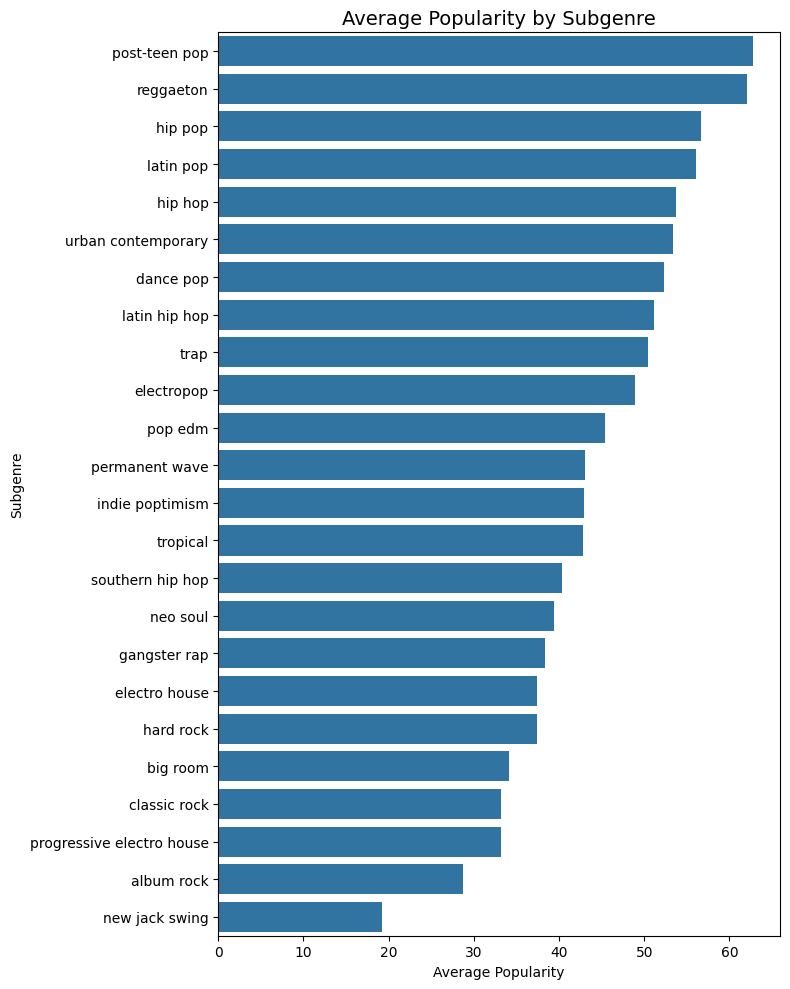

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so 'playlist_subgenre' becomes a column again
plot_data = subgenre_stats[('track_popularity', 'mean')].reset_index()
plot_data.columns = ['playlist_subgenre', 'avg_popularity']

# Sort by popularity
plot_data = plot_data.sort_values('avg_popularity', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(
    data=plot_data,
    y='playlist_subgenre',
    x='avg_popularity',
)

plt.title('Average Popularity by Subgenre', fontsize=14)
plt.xlabel('Average Popularity')
plt.ylabel('Subgenre')
plt.tight_layout()
plt.show()


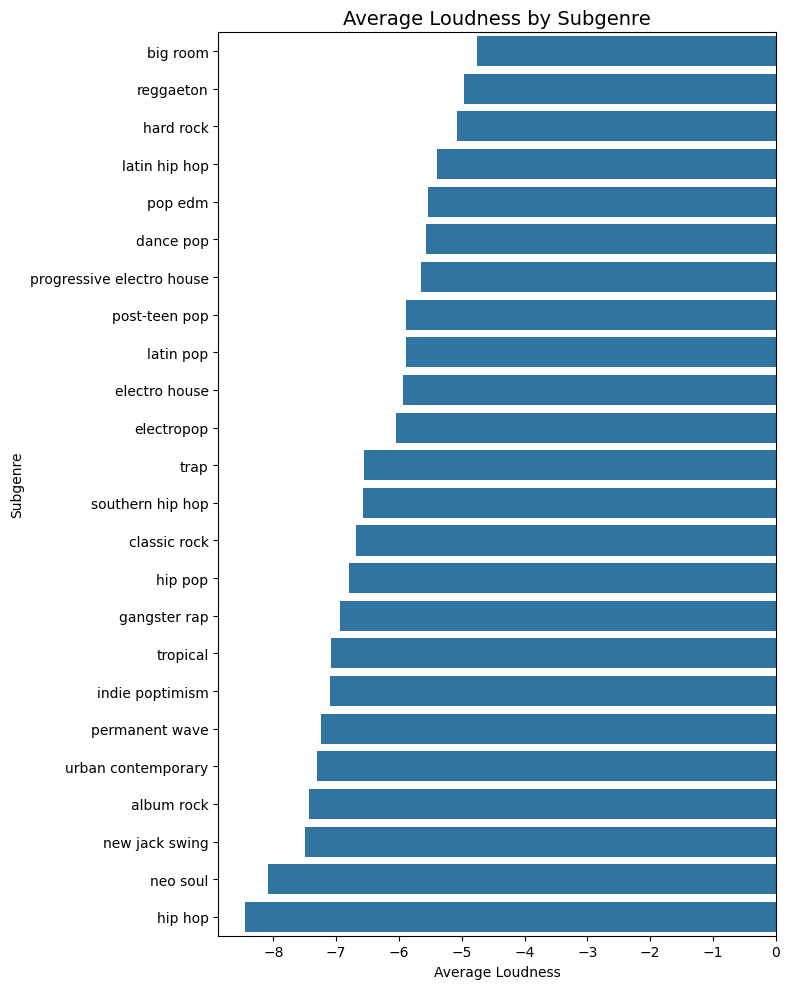

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so 'playlist_subgenre' becomes a column again
plot_data = subgenre_stats[('loudness', 'mean')].reset_index()
plot_data.columns = ['playlist_subgenre', 'avg_loudness']

# Sort by popularity
plot_data = plot_data.sort_values('avg_loudness', ascending=False)

plt.figure(figsize=(8, 10))
sns.barplot(
    data=plot_data,
    y='playlist_subgenre',
    x='avg_loudness',
)

plt.title('Average Loudness by Subgenre', fontsize=14)
plt.xlabel('Average Loudness')
plt.ylabel('Subgenre')
plt.tight_layout()
plt.show()


In [72]:
y=df['track_popularity']

x=df[['danceability','energy','instrumentalness','tempo']]

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

r2_test = model.score(x_test, y_test)
print("R^2 score:", r2_test)

Intercept: 45.32584163870904
Coefficients: [ 1.84897034e+01 -1.64687432e+01 -1.72133199e+01  1.37356554e-02]
R^2 score: 0.05751308655815157


In [76]:
y_pred = model.predict(x_test)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df.head(10)

,Actual,Predicted
16811,42,49.183029
30969,53,48.605727
3746,0,48.507297
5363,5,45.124914
4364,67,49.295611
28341,26,31.543267
3738,6,50.625962
30509,43,46.608365
27805,41,42.443162
10682,76,56.275631


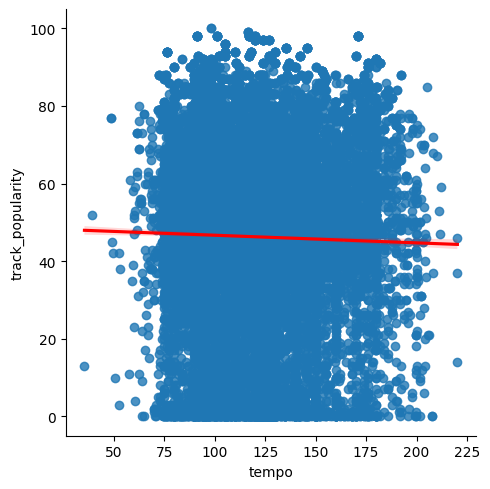

In [77]:
import seaborn as sns
sns.lmplot(x='tempo', y='track_popularity', data=df, line_kws={'color': 'red'})


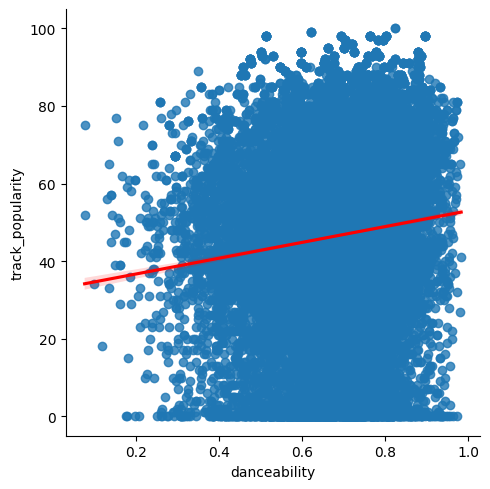

In [78]:
sns.lmplot(x='danceability', y='track_popularity', data=df, line_kws={'color': 'red'})


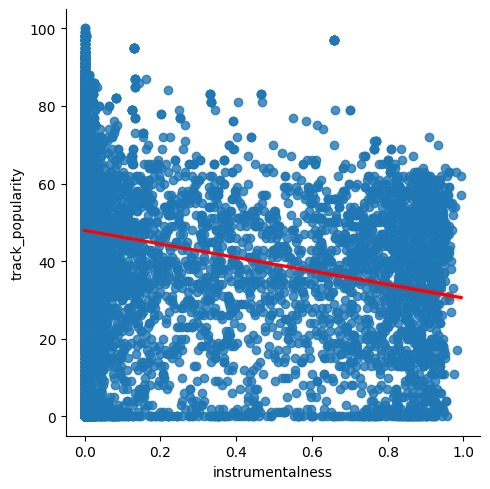

In [79]:
sns.lmplot(x='instrumentalness', y='track_popularity', data=df, line_kws={'color': 'red'})


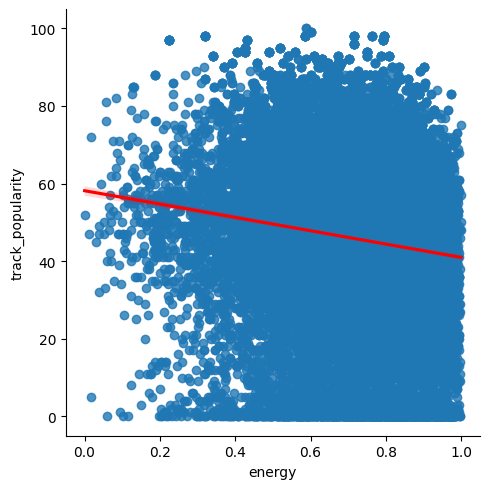

In [80]:
sns.lmplot(x='energy', y='track_popularity', data=df, line_kws={'color': 'red'})


TRYING RANDOM FOREST (NON-LINEAR MODEL)

In [81]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# STEP 2: Split the data using the same features
X = df[features]
y = df['track_popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Train your model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# STEP 4: Predict safely
y_pred = model.predict(X_test)
print(y_pred)


[53.39357143 49.39566667 54.841      ... 34.06       44.55
 43.08      ]


In [82]:
from sklearn.metrics import r2_score, mean_absolute_error
r2= r2_score(y_test, y_pred)
print("R^2 score for Random Forest:", r2)
absoluteError=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error for Random Forest:", absoluteError)


R^2 score for Random Forest: 0.3541567253253277
Mean Absolute Error for Random Forest: 14.251602362195472


            Feature  Importance
2          loudness    0.121650
5  instrumentalness    0.119060
1            energy    0.114876
8             tempo    0.113950
0      danceability    0.111869
4      acousticness    0.110774
3       speechiness    0.106947
7           valence    0.102992
6          liveness    0.097882


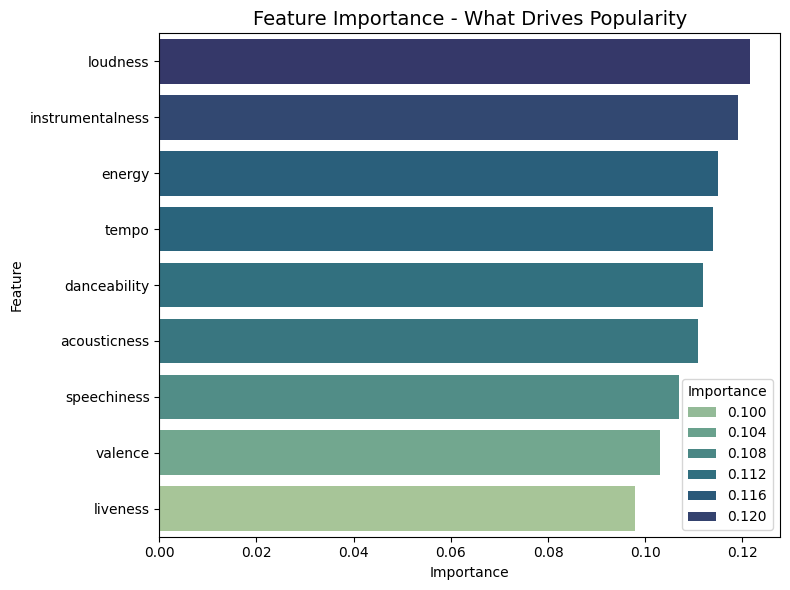

In [84]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)

# Plot the top features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='crest', hue='Importance')
plt.title('Feature Importance - What Drives Popularity', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

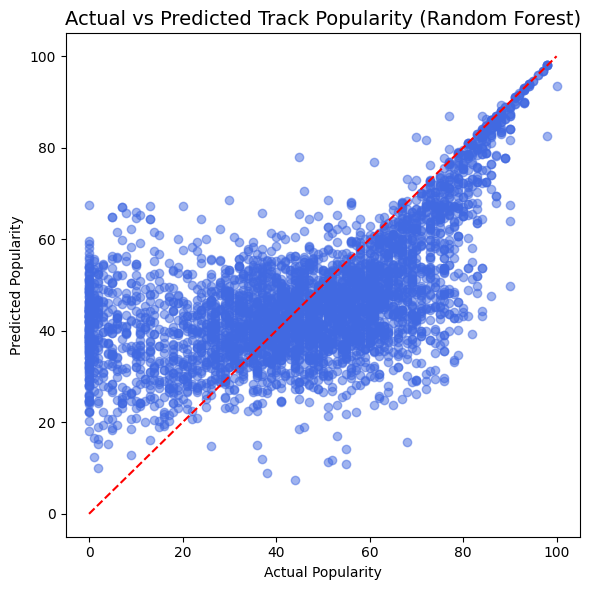

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Track Popularity (Random Forest)", fontsize=14)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # ideal line
plt.tight_layout()
plt.show()
